# Intern Name - Karthik Arumugam

# Task 1 - Student's Percentage Prediction Model

#### To explore Supervised Machine Learning

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. Data can be found at [http://bit.ly/w-data]

#### What will be the predicted score of a student if the student studiess for 9.25 hrs in a day?

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###### Reading the data

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print('The Data:-')
df

The Data:-


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Checking for null values if any

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

We can see that are no null values so we don't need to perform any data cleaning

### Data visualization - Plotting the data

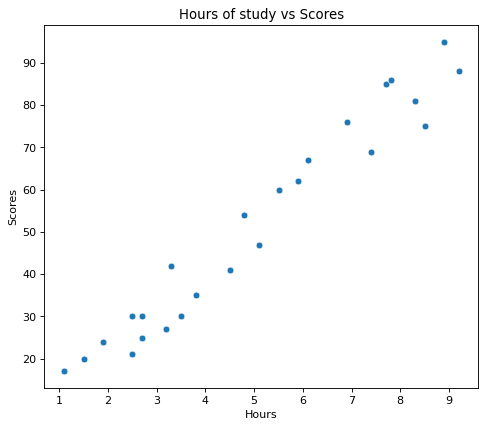

In [4]:
plt.figure(figsize=(7,6),dpi=80)

sns.scatterplot(data=df,x='Hours',y='Scores')
plt.title('Hours of study vs Scores');

#### We can see that there is linear relationship between the Hours and Scores

#### We are performing a Linear Regression task, so now we will plot a regression plot which will help us visualize the best fit regression line for the data

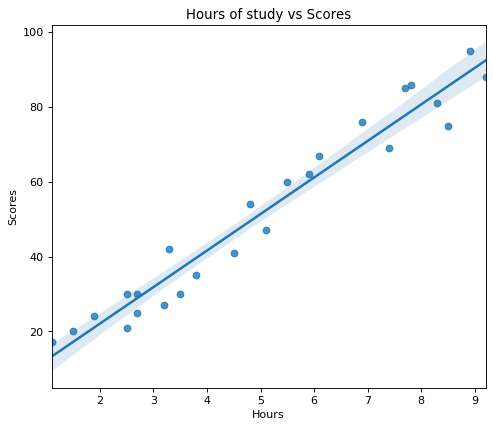

In [5]:
plt.figure(figsize=(7,6),dpi=80)

sns.regplot(data=df,x='Hours',y='Scores')
plt.title('Hours of study vs Scores');

#### The above regression plot shows us the best fit line

## 1.Feature Selection

##### We will have two features 
##### One which is the independant feature - The Hours
##### Second is our target label - the dependant feature - The percentage of scores

In [6]:
X = df['Hours'].values
X = X.reshape(-1,1)
print(X.shape)

(25, 1)


In [7]:
y = df['Scores'].values
y = y.reshape(-1,1)
y.shape

(25, 1)

### 2.Dividing our data into training and testing data so that we can train our model on training dataset and test it's accuracy on the test dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

## 3.Linear Regression Model Creation

##### We will use the Scikit-Learn library

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
scores_model = LinearRegression()

In [12]:
scores_model.fit(X_train,y_train)
print('Model training complete')

Model training complete


###### Let's take a look at the slope and the intercept

In [13]:
print('The slope is :- ',scores_model.coef_)
print('The intercept is :-',scores_model.intercept_)

The slope is :-  [[9.71409219]]
The intercept is :- [2.48036709]


##### Let's plot the Regression line of our trained model

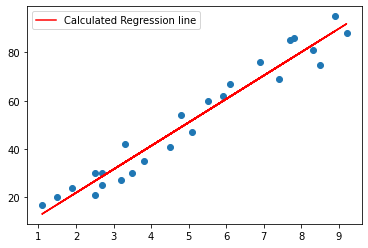

In [14]:
model_equation = scores_model.coef_ * X + scores_model.intercept_

# Plotting the regression plot
plt.scatter(X,y)
plt.plot(X, model_equation, color = 'red', label = 'Calculated Regression line')
plt.legend();

### Prediction on test dataset

In [15]:
scores_prediction = scores_model.predict(X_test)
scores_prediction

array([[83.10733229],
       [26.76559757],
       [26.76559757],
       [69.50760322],
       [59.79351103],
       [28.70841601],
       [34.53687133]])

In [16]:
scores_pred = scores_prediction.flatten()
scores_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

In [17]:
y_test = y_test.flatten()

In [18]:
predicted_scores = pd.DataFrame({'Actual':y_test, 'Predicted':scores_pred})
predicted_scores

,Actual,Predicted
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


In [19]:
# Estimating the training and test scores
print("Training score: ", scores_model.score(X_train, y_train))
print("Test score: ", scores_model.score(X_test, y_test))

Training score:  0.9514783240656935
Test score:  0.9553509219739938


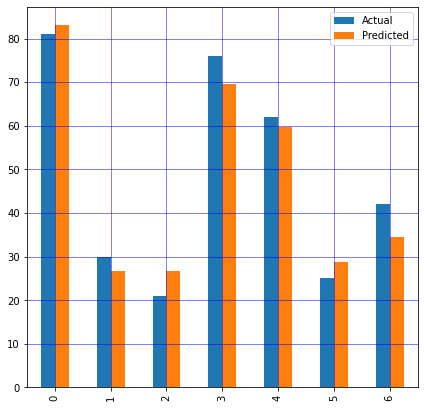

In [20]:
# Plotting a grid to visualize the actual vs predicted value

predicted_scores.plot(kind='bar',figsize=(7,7))
plt.grid(which = 'major', linewidth='0.5', color='blue')

In [21]:
# Let's test with some random new data

hour = 9.25
test = np.array(hour)
test1 = test.reshape(-1,1)

In [22]:
# Predict

new_pred = scores_model.predict(test1)
print('Percentage of score for {} hours of study is {}'.format(test,new_pred))

Percentage of score for 9.25 hours of study is [[92.33571987]]


#### Thus we have predicted the score for 9.25 hours of study which was main question of this task

### Evaluating the final model

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
print('The Mean absolute error is :-',mean_absolute_error(y_test,scores_pred))

print('The Root mean squared error is :-',np.sqrt(mean_squared_error(y_test,scores_pred)))

The Mean absolute error is :- 4.425394675156183
The Root mean squared error is :- 4.8493706843873285


In [25]:
print('The R2 score is',r2_score(y_test,scores_pred))

The R2 score is 0.9553509219739938


### From above metrics Linear Regression algorithm has been proven good for the given data to predict/estimate the values

The model accuracy is 95.53%

# Thank You